<a href="https://colab.research.google.com/github/MarcosP7635/Energy/blob/main/Energy_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context

The most famous method of converting ionizing radiation into electricity is with radiothermal generators (RTG) which typically have high efficiencies but low power densities due to the mass of the thermal couples. 

Alternatively, there is ongoing research in betavoltaics, the conversion of beta particles into electricity using semiconductors. Although small in mass, they are currently held back energy conversion efficiencies < 10% 

  https://doi.org/10.1016/j.apradiso.2013.07.026 


Recently, there have been theoretical developments in the direct storage of the kinetic energy of beta particles in an electric field, with efficiencies > 20% 

  https://doi.org/10.1016/j.apradiso.2019.03.040

The recent testing of radiolytic conversion assisted by plasmons in thin foils has been tested to have energy efficiencies near 50% 

  https://doi/org/10.1038/srep05249

#What is the power density for batteries using each of the above methods? 

In [1]:
from astropy import constants as const
from astropy import units as units

##Aqueous plasmon assisted radiolysis 
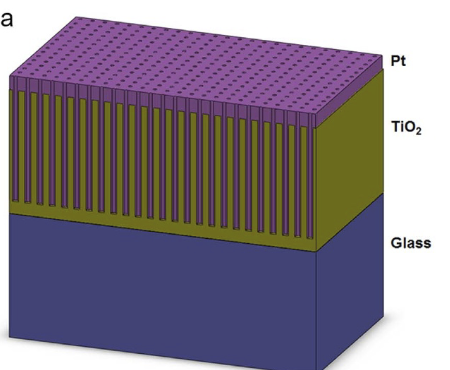

###Setup

In [5]:
power_per_area = 75 * units.microwatt / (units.cm ** 2)
power_per_area

<Quantity 75. uW / cm2>

What is the mass per area of the system? 

"water (1 mm)/Pt (50 nm)/TiO2 (1 mm)/glass (1 mm) structure"

In [21]:
 titanium_thickness = 2 * units.micron
 platinum_film_thickness = 50 * units.nanometer 
 water_thickness = 1 * units.mm
 titanium_density = 5 * units.g /(units.cm ** 3) 
 platinum_density = 20 * units.g / (units.cm ** 3) 
 water_density = 1 * units.g / units.cm**3

In [25]:
def mass_per_area(density, thickness): 
  return (density * thickness).to(units.g / units.cm**2)

We can take a lowerbound of the power density by assuming the entirety of the titanium layer has the same density as platinum 

In [47]:
total_mass_per_area = (mass_per_area(platinum_density, platinum_film_thickness)
                    + .5 * mass_per_area(platinum_density, titanium_thickness)
                    + .5 * mass_per_area(titanium_density, titanium_thickness)
                      + mass_per_area(water_density, water_thickness)) 
total_mass_per_area

<Quantity 0.1026 g / cm2>

https://raw.githubusercontent.com/MarcosP7635/Energy/main/Plots/maximum_power_densities.png?token=GHSAT0AAAAAABU2C3ZHFNZ65NWT3ENBAZGCYX7DANQ 

Even after 10 years, 228Ra would release ~3 W/g

In [51]:
radium_density = 6 * units.g / units.cm**3
radium_thickness = 1 * units.micron #What is the thinnest this could be? 
radium_mass_per_area = mass_per_area(radium_density, radium_thickness) 
total_mass_per_area += radium_mass_per_area
total_mass_per_area

<Quantity 0.1038 g / cm2>

In [49]:
radium_power_density = 5 * units.W / units.g
efficiency = .5 
total_power_density = ((radium_mass_per_area * radium_power_density) / 
                        total_mass_per_area) * efficiency 

<Quantity 0.01453488 W / g>

###Results

In [64]:
total_thickness = (radium_thickness + platinum_film_thickness + 
                   titanium_thickness + water_thickness)
area = 1 * units.cm**2
total_volume = (total_thickness * area).to(units.cm ** 3)
total_mass_density = total_mass_per_area * units.cm**2 / total_volume
total_power_per_volume = total_mass_density * power_density_aqueous
total_power_per_volume

<Quantity 0.00074556 W / cm3>

In [65]:
total_power_density

<Quantity 0.01453488 W / g>

##Direct storage with electric field